## Tidy Data Example ShareOK Submissions

In [11]:
#Import Pandas an Numpy
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 100)

## Load Data

In [12]:
df=pd.read_csv('shareok_data_tidy_v1.1.csv',encoding = 'iso-8859-1')
#Format Columns
df.Department.replace(np.nan,'Not Provided',inplace=True)
df.date_submit = pd.to_datetime(df.date_submit)
df.date_approve=pd.to_datetime(df.date_approve)

## Groupby Function

In [13]:
grp = df.groupby(['College','Department','Type'])
grp=grp.submission_id.agg(['size']).sort_index()
grp

size
College                                            Department                                         Type              
College of Architecture                            Not Provided                                       Dissertation     2
College of Arts and Sciences                       Department of Anthropology                         Dissertation    14
                                                                                                      Thesis          10
                                                   Department of Biology                              Dissertation    20
                                                                                                      Thesis           4
                                                   Department of Chemistry and Biochemistry           Dissertation    27
                                                   Department of Communication                        Dissertation    18
                                                   Department of Economics                            Dissertation    11
                                                   Department of Engineering Physics                  Thesis           1
                                                   Department of English                              Dissertation    12
                                                                                                      Thesis           1
                                                   Department of Health and Exercise Science          Dissertation     9
                                                                                                      Thesis           5
                                                   Department of History                              Dissertation    15
                                                                                                      Thesis           6
                                                   Department of History of Science                   Dissertation     2
                                                                                                      Thesis           2
                                                   Department of Human Relations                      Dissertation     1
                                                                                                      Thesis           1
                                                   Department of Mathematics                          Dissertation    17
                                                   Department of Microbiology and Plant Biology       Dissertation    13
                                                                                                      Thesis           3
                                                   Department of Modern Languages, Literatures, an... Dissertation     4
                                                                                                      Thesis           1
                                                   Department of Native American Studies              Thesis           2
                                                   Department of Philosophy                           Dissertation     9
                                                                                                      Thesis           1
                                                   Department of Political Science                    Dissertation     6
                                                                                                      Thesis           1
                                                   Department of Politicial Science                   Thesis           1
                                                   Department of Psychology                           Dissertation    38
                                                                                                      Thesis           6
  

## Sort and Rename Columns

In [14]:
grouped=grp.reset_index()
grouped.columns=['College', 'Department', 'Type', 'Count']
grouped.sort_values(['College','Department','Type','Count'], ascending=[1, 0,1,1])

,College,Department,Type,Count
0,College of Architecture,Not Provided,Dissertation,2
39,College of Arts and Sciences,School of Library and Information Studies,Thesis,1
38,College of Arts and Sciences,School of Industrial and Systems Engineering,Thesis,1
36,College of Arts and Sciences,School of Computer Science,Dissertation,1
37,College of Arts and Sciences,School of Computer Science,Thesis,2
35,College of Arts and Sciences,Not Provided,Dissertation,11
34,College of Arts and Sciences,Homer L. Dodge Department of Physics and Astro...,Dissertation,20
32,College of Arts and Sciences,Department of Sociology,Dissertation,12
33,College of Arts and Sciences,Department of Sociology,Thesis,7
30,College of Arts and Sciences,Department of Psychology,Dissertation,38


## Plot data

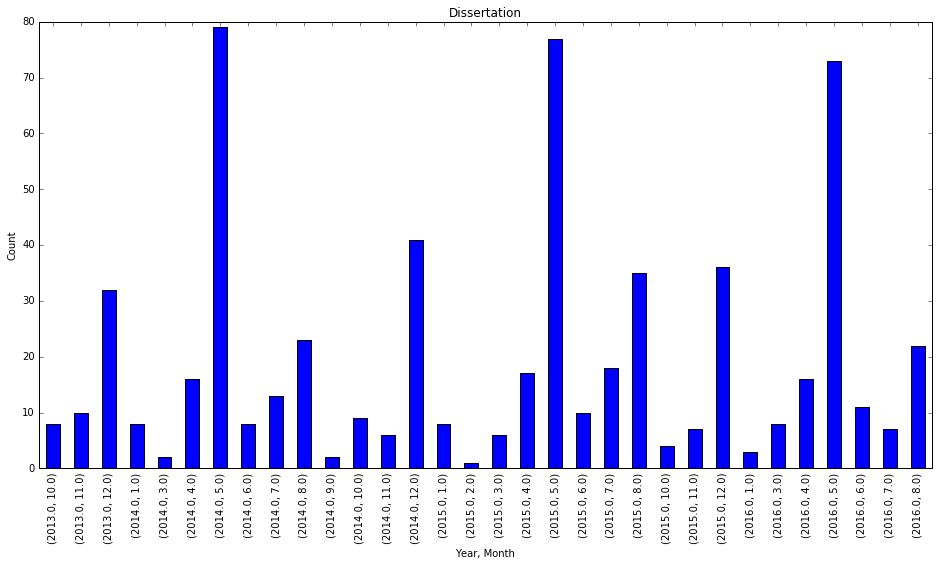

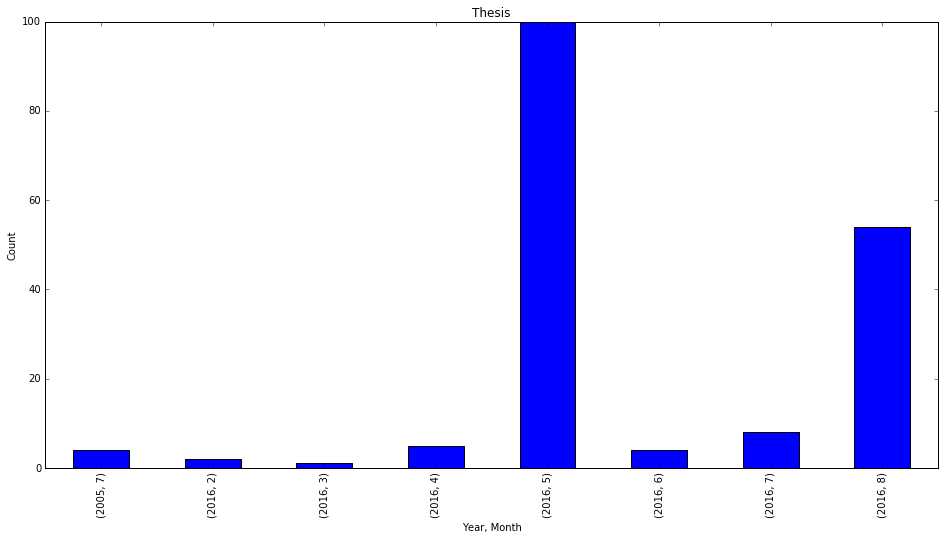

In [15]:
% matplotlib inline
def bar_plot(plot_type):
    df1=df[df.Type==plot_type].sort_values(['date_approve'],ascending=[1])
    grouped= df1.groupby([df1.date_approve.map(lambda x: x.year) ,df1.date_approve.map(lambda x: x.month)])
    ax=grouped.submission_id.agg(['size']).plot(kind='bar',rot=90,title=plot_type,figsize=(16,8),legend=False)
    ax.set_xlabel("Year, Month")
    ax.set_ylabel("Count")

bar_plot("Dissertation")
bar_plot("Thesis")

## Pivot Table Bar Chart

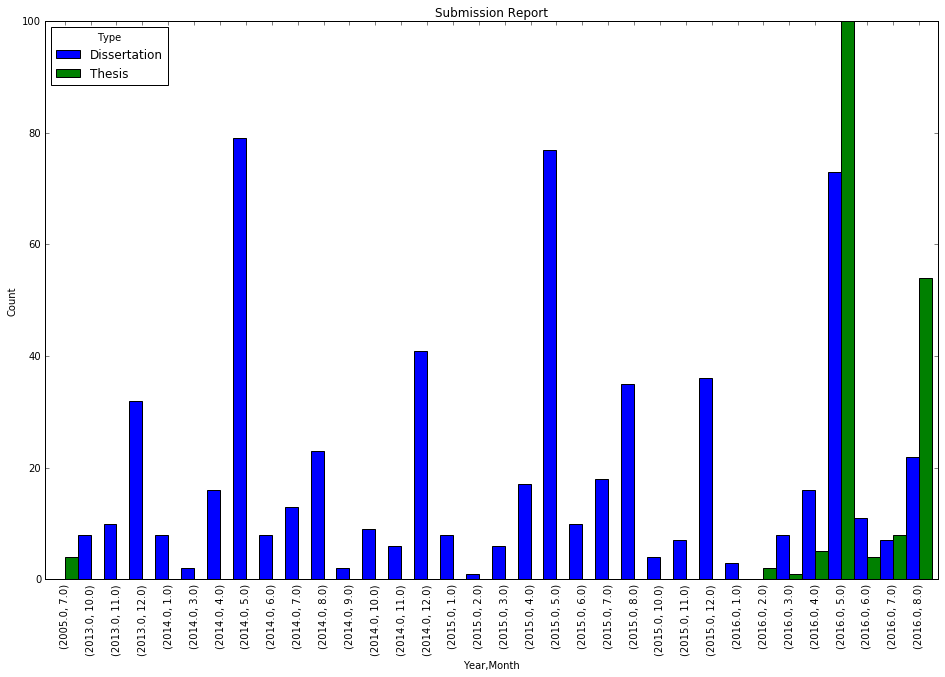

In [18]:
#Sort by Date approved
df1=df.sort_values(['date_approve'],ascending=[1])
#Groupby and Aggregation
grouped= df1.groupby(['Type',df1.date_approve.map(lambda x: x.year) ,df1.date_approve.map(lambda x: x.month)])
grp=grouped.submission_id.agg(['size'])
#Rename Index Names and Columns
grp.index.names=['Type','Year','Month']
grp.columns=['Count']
#Reset and Perform Pivot Table
grp=grp.reset_index()
grp=grp.pivot_table(index=['Year','Month'],columns='Type',values="Count")
#Plot
ax=grp.plot(kind='bar',title='Submission Report',figsize=(16,10),width=1)
ax.set_ylabel("Count")

## Days to Process

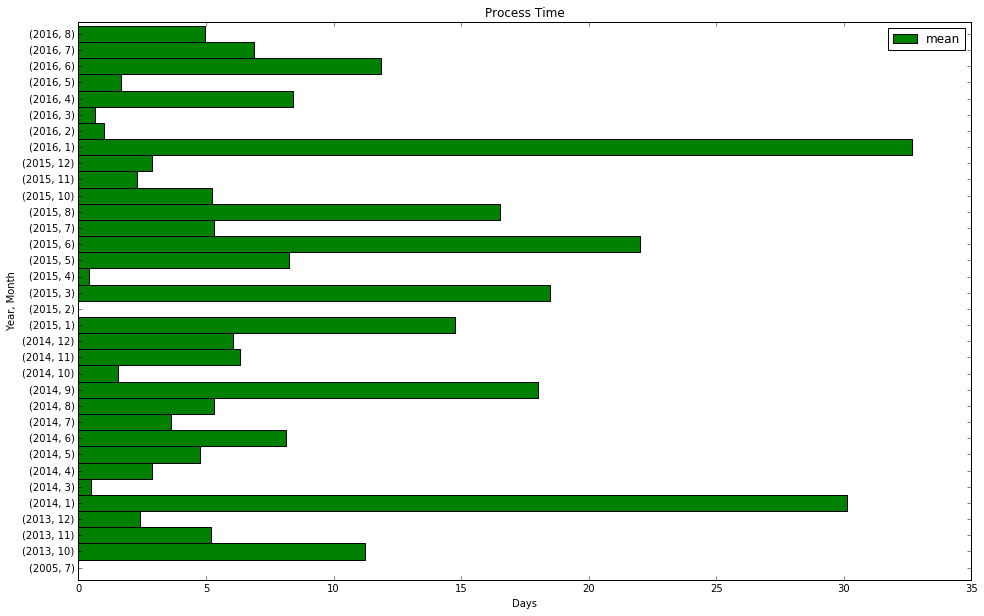

In [41]:
#Sort by Date approved
df1=df.sort_values(['date_approve'],ascending=[1])
#Filter and Calculate days 
df1=df1[df1.date_approve.notnull()]
df1=df1[df1.date_submit.notnull()]
df1['days_to_process']=df1['date_approve'] - df1['date_submit']
df1['days_to_process']=df1['days_to_process'].astype('timedelta64[D]').astype(int)
#Groupby and Aggregate
grp = df1.groupby([df1.date_approve.map(lambda x: x.year) ,df1.date_approve.map(lambda x: x.month)])
grp = grp.days_to_process.agg(['mean'])
#Plot
ax = grp.plot(kind='barh',title='Process Time',figsize=(16,10),width=1,color='green')
ax.set_ylabel("Year, Month")
ax.set_xlabel("Days")

In [43]:
#Total Process Mean Time in Days
grp.mean()

mean    7.95467
dtype: float64